A continuación se muestra una matriz de expresión genética:

In [59]:
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,⋯,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,⋯,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,⋯,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,⋯,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,⋯,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,⋯,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [60]:
ncol(genexp)
nrow(genexp)


[1] 482

[1] 86

### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

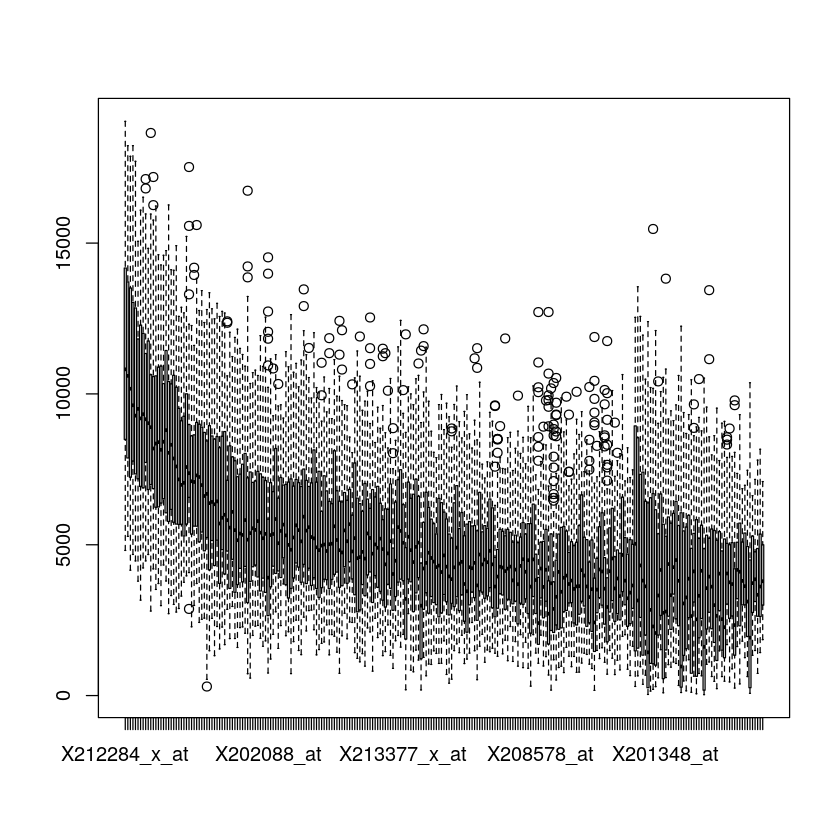

In [61]:
# Analizando los datos vemos que hay dos grupos muy distintos de datos, 
# por lo que es interesante normalizarlos y con outliers en todos los casos
boxplot(genexp[,2:252])

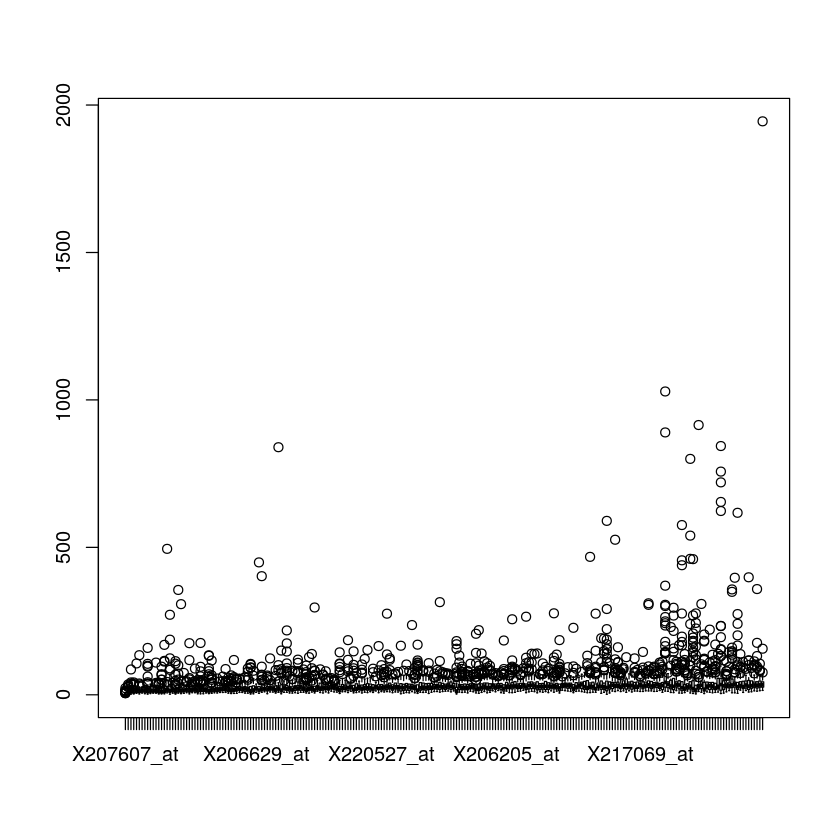

In [62]:
boxplot(genexp[,253:ncol(genexp)])

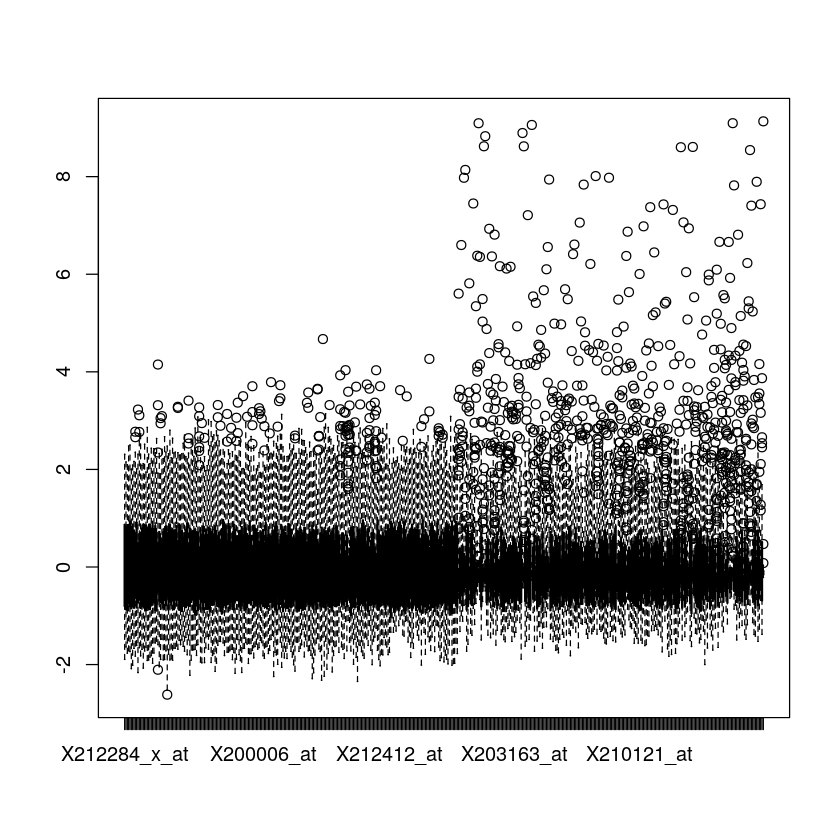

In [63]:
#Normalizamos

mnCols<-repmat(colMeans(genexp[,2:ncol(genexp)]),n = nrow(genexp[,2:ncol(genexp)]),m=1)
sdCols<-repmat(sapply(genexp[,2:ncol(genexp)], sd,na.rm=T),n = nrow(genexp[,2:ncol(genexp)]),m=1)
genexp_norm<-(genexp[,2:ncol(genexp)]-mnCols)/sdCols

boxplot(genexp_norm[,1:ncol(genexp_norm)])

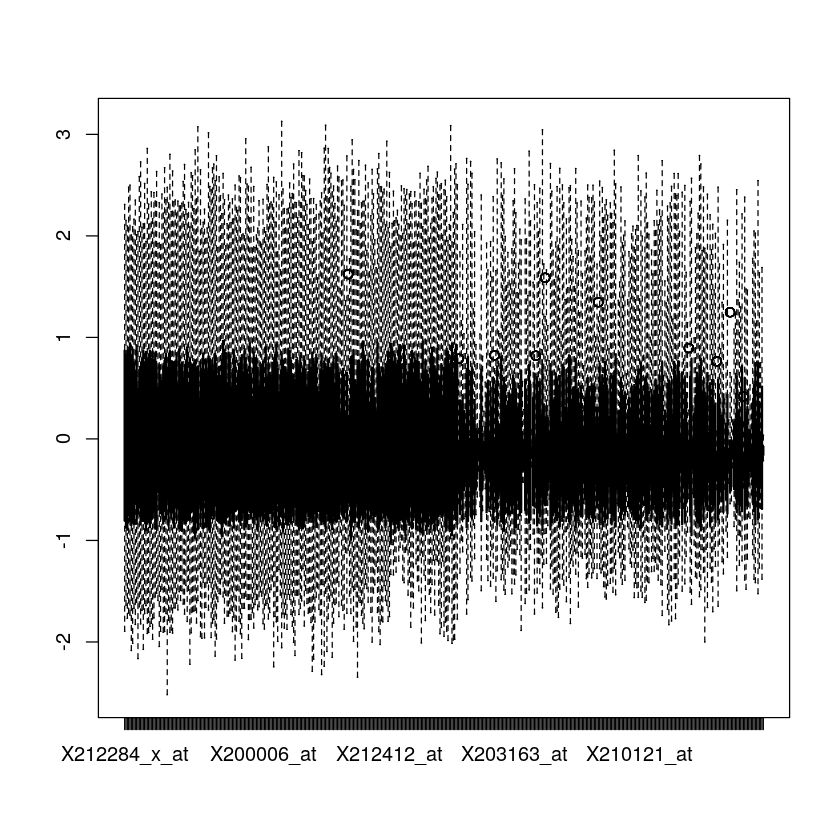

In [64]:
# Eliminamos outliers
for (i in 1:ncol(genexp_norm)){
    x <- genexp_norm[,i]
    qnt  <- quantile(x, probs=c(.25, .75), na.rm = T)
    caps <- quantile(x, probs=c(.1, .90), na.rm = T)    
    H <- 1.5 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    genexp_norm[,i]<-x
}

boxplot(genexp_norm[,1:ncol(genexp_norm)])

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [65]:
# Identificamos cada fila como 0 (Normal) o 1 (Cancer) añadiendo la columna X en función de "genexp"
genexp_norm$X <- ifelse(grepl('^Normal.', genexp$X),0,1)

In [ ]:
# Lo siento, estas dos últimas semanas he estado fuera trabajando

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*